<a href="https://colab.research.google.com/github/SmileCat42/Deep-Learning/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_x=train_images[:50000]
train_valid=train_images[50000:]

train_y=train_labels[:50000]
train_valid_y=train_labels[50000:]

## **<font color= "purple">128</font>**

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
htr=network.fit(train_x, train_y, epochs=20, batch_size=256, validation_data=(train_valid, train_valid_y))

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8077 - loss: 0.7216 - val_accuracy: 0.9346 - val_loss: 0.2371
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9321 - loss: 0.2408 - val_accuracy: 0.9416 - val_loss: 0.1995
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9506 - loss: 0.1765 - val_accuracy: 0.9527 - val_loss: 0.1648
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9614 - loss: 0.1364 - val_accuracy: 0.9661 - val_loss: 0.1243
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9688 - loss: 0.1110 - val_accuracy: 0.9677 - val_loss: 0.1154
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9744 - loss: 0.0925 - val_accuracy: 0.9695 - val_loss: 0.1103
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9773 - loss: 0.0816 - val_accuracy: 0.9723 - val_loss: 0.0937
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9807 - loss: 0.0701 - val_accuracy: 

In [ ]:
history_dict = htr.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1 )

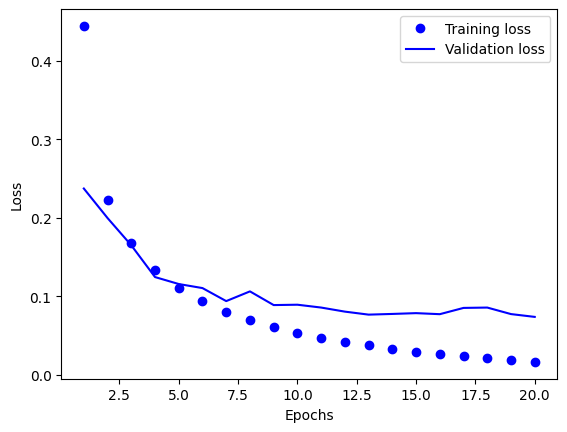

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend();
plt.show()

## **<font color="pink">256</font>**

In [ ]:
from tensorflow.keras import regularizers

network2 = models.Sequential()
network2.add(layers.Dense(256,
                          activation='relu',
                          kernel_regularizer=regularizers.l2(0.001),
                          input_shape=(28 * 28,)))
network2.add(layers.Dropout(0.25))
network2.add(layers.Dense(10, activation='softmax'))

In [ ]:
network2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
htr2=network2.fit(train_x, train_y, epochs=20, batch_size=256, validation_data=(train_valid, train_valid_y))

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8024 - loss: 0.9959 - val_accuracy: 0.9364 - val_loss: 0.3908
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9327 - loss: 0.3847 - val_accuracy: 0.9550 - val_loss: 0.2772
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9486 - loss: 0.2861 - val_accuracy: 0.9637 - val_loss: 0.2220
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9556 - loss: 0.2418 - val_accuracy: 0.9652 - val_loss: 0.2117
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9626 - loss: 0.2128 - val_accuracy: 0.9671 - val_loss: 0.1892
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9632 - loss: 0.1954 - val_accuracy: 0.9699 - val_loss: 0.1764
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9672 - loss: 0.1845 - val_accuracy: 0.9687 - val_loss: 0.1693
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9696 - loss: 0.1723 - val_accu

In [ ]:
history_dict2 = htr2.history
history_dict2.keys()

loss_values = history_dict2['loss']
val_loss_values = history_dict2['val_loss']
epochs = range(1, len(loss_values) + 1 )

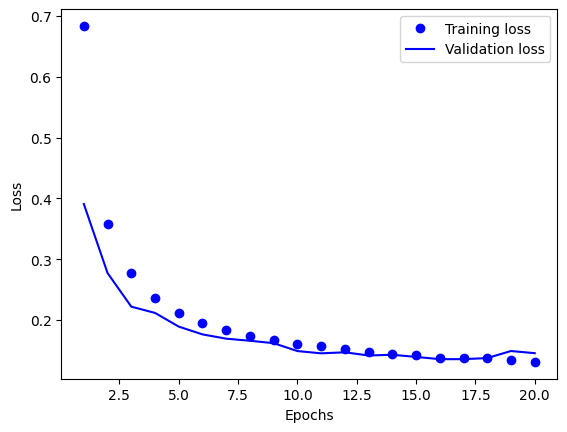

In [ ]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend();
plt.show()

In [ ]:
import numpy as np
from PIL import Image, ImageOps

def predict_my_image(image_path, model):
    # 1. โหลดรูปภาพและแปลงเป็น Grayscale (L)
    img = Image.open(image_path).convert('L')

    # 2. MNIST ใช้พื้นหลังดำ เส้นขาว ถ้าเขียนดำบนกระดาษขาวให้สลับสี (Invert)
    img = ImageOps.invert(img)

    # 3. ย่อขนาดเป็น 28x28 พิกเซล
    img = img.resize((28, 28))

    # 4. แปลงเป็น Numpy Array และทำให้เป็น Vector (ตามที่คุณตั้ง input_shape ไว้ 28*28)
    img_array = np.array(img)
    img_array = img_array.reshape(1, 28 * 28)

    # 5. Normalize ค่าพิกเซล
    img_array = img_array.astype('float32') / 255

    # 6. ทำนายผล
    prediction = model.predict(img_array)
    result = np.argmax(prediction)

    print(f"โมเดลทายว่าเป็นเลข: {result}")
    return result

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
result = predict_my_image('c.png', network2)
print(f"ผลการทำนายคือ: {result}")

In [ ]:
result = predict_my_image('a.png', network2)
print(f"ผลการทำนายคือ: {result}")

In [ ]:
result = predict_my_image('b.png', network2)
print(f"ผลการทำนายคือ: {result}")

In [ ]:
result = predict_my_image('d.png', network2)
print(f"ผลการทำนายคือ: {result}")